In [1]:
#%pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

vout_mean1 12.11632109375


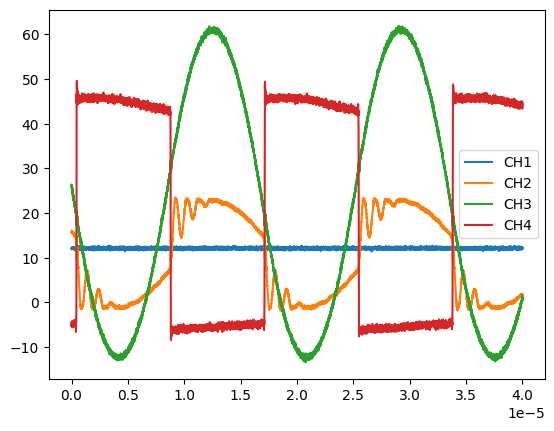

In [3]:
ref1 = "2025-12-09_14-47-45-457.csv"
df = pd.read_csv(ref1)
Ts = df.Ts.values[0]
time = np.arange(0,len(df)*Ts, Ts)
dic = {}
for i in range(1,5):
    dic[f"CH{i}"]= df[f"CH{i}"].values
    plt.plot(time, dic[f"CH{i}"], label = f"CH{i}")
vout_mean1 = dic[f"CH1"].mean()
print("vout_mean1", vout_mean1 )
plt.legend()

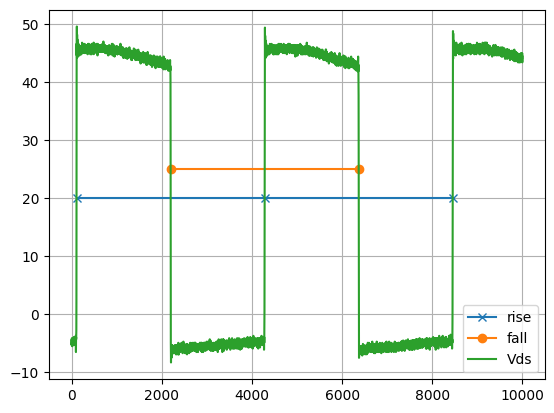

In [4]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]
CH4 = dic["CH4"]
idx_rise = trigger (CH4, transition= "rise")
idx_fall= trigger (CH4, transition= "fall")
plt.plot(idx_rise, len(idx_rise)*[20], marker="x", label = "rise")
plt.plot(idx_fall, len(idx_fall)*[25], marker="o", label = "fall")
plt.plot(CH4, label = "Vds")
plt.legend()
plt.grid()

In [5]:
indx = idx_rise+idx_fall
indx.sort()
freqs = indx[1:3]
Freq =1/((freqs [1]-freqs [0])*Ts)
print(Freq)

119961.61228406908


vout_mean1 0.6309409375


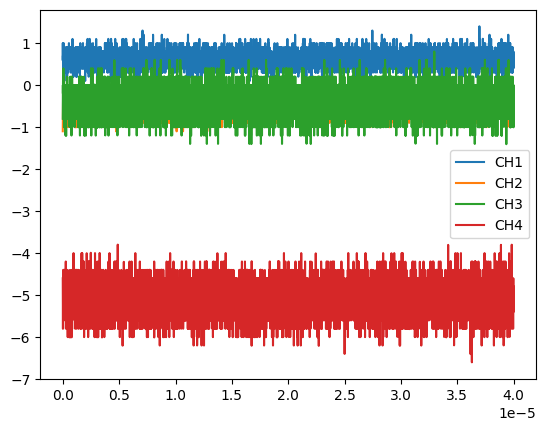

In [6]:
ref2 = "2025-12-09_14-53-35-369.csv"
df = pd.read_csv(ref2)
Ts = df.Ts.values[0]
time = np.arange(0,len(df)*Ts, Ts)
dic = {}
for i in range(1,5):
    dic[f"CH{i}"]= df[f"CH{i}"].values
    plt.plot(time, dic[f"CH{i}"], label = f"CH{i}")
vout_mean2 = dic[f"CH1"].mean()
print("vout_mean1", vout_mean2 )
plt.legend()

In [7]:
vmean_corr= vout_mean1 -vout_mean2
print("vmean_corr", vmean_corr, "Expected Vout = 11.26V") 

vmean_corr 11.48538015625 Expected Vout = 11.26V


In [8]:
a = 11.26/vmean_corr
b = -a *vout_mean2
vmean_corr= a *vout_mean1 +b 

print("vmean_corr = ax+b", vmean_corr, "Expected Vout = 11.26V", "a,b = ", a,b) 

vmean_corr = ax+b 11.260000000000002 Expected Vout = 11.26V a,b =  0.980376778723571 -0.61855984387108


In [9]:
import glob

files = glob.glob("**/*.csv", recursive=True)
print(files)


['2025-12-09_14-47-45-457.csv', '2025-12-09_14-49-39-239.csv', '2025-12-09_14-49-54-976.csv', '2025-12-09_14-50-08-497.csv', '2025-12-09_14-50-21-504.csv', '2025-12-09_14-50-34-420.csv', '2025-12-09_14-50-47-806.csv', '2025-12-09_14-51-03-655.csv', '2025-12-09_14-51-17-244.csv', '2025-12-09_14-51-35-537.csv', '2025-12-09_14-51-50-104.csv', '2025-12-09_14-52-03-368.csv', '2025-12-09_14-52-19-356.csv', '2025-12-09_14-52-29-472.csv', '2025-12-09_14-53-35-369.csv']


In [10]:
import ast

with open("2025-12-09_14-52-03-368.txt") as f:
    txt = f.read()

dic_ = ast.literal_eval(txt)
dic_.keys()


dict_keys(['CH1', 'CH2', 'CH3', 'CH4', 'general_config'])

In [11]:
dic_['general_config']

{'general': {'HORIZONTAL:MAIN:SCALE?': ':HORIZONTAL:MAIN:SCALE 4.0E-6\n',
  'WFMPRE:NR_Pt?': ':WFMPRE:NR_PT 10000\n'}}

In [27]:
res = []
for f in files: 
    if not f in [ref1, ref2]:
        df = pd.read_csv(f)
        Ts = df.Ts.values[0]
        time = np.arange(0,len(df)*Ts, Ts)
        vout_mean1 = df["CH1"].mean()
        vmean_corr= a *vout_mean1 +b 


        CH4 = df["CH4"].values
        idx_rise = trigger (CH4, transition= "rise")
        idx_fall= trigger (CH4, transition= "fall")
        indx = idx_rise+idx_fall
        indx.sort()
        #freqs = indx[1:3]
        freqs =idx_rise[1:3]
        Freq =1/((freqs [1]-freqs [0])*Ts)
        res.append({"f":f,"Freq": Freq, "vout_mean":vmean_corr})
            

In [28]:
df= pd.DataFrame(res).sort_values("Freq")
df


,f,Freq,vout_mean
0,2025-12-09_14-49-39-239.csv,62609.566742,10.295160
1,2025-12-09_14-49-54-976.csv,66418.703507,9.674866
2,2025-12-09_14-50-08-497.csv,68965.517241,9.297609
3,2025-12-09_14-50-21-504.csv,73768.073178,8.977548
4,2025-12-09_14-50-34-420.csv,80000.000000,8.756595
5,2025-12-09_14-50-47-806.csv,90909.090909,9.087747
6,2025-12-09_14-51-03-655.csv,100000.000000,8.167233
7,2025-12-09_14-51-17-244.csv,112460.638776,9.470037
8,2025-12-09_14-51-35-537.csv,119961.612284,8.297341
9,2025-12-09_14-51-50-104.csv,130412.102243,8.230350


<Axes: xlabel='Freq'>

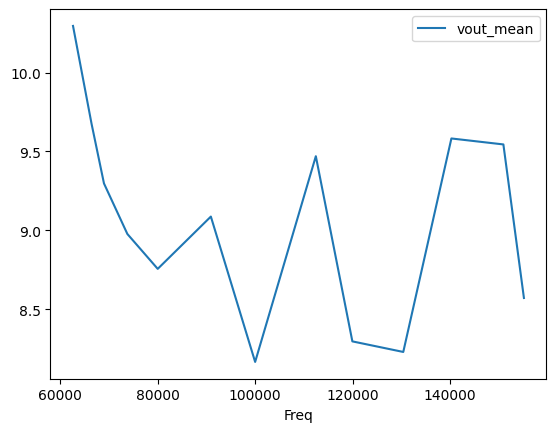

In [29]:
df.plot(x="Freq", y="vout_mean")

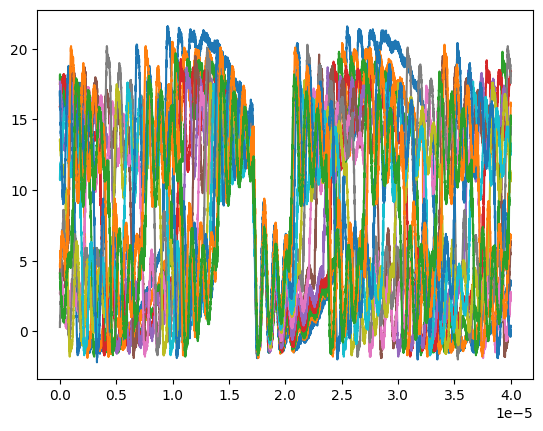

In [32]:
for f in files: 
    if not f in [ref1, ref2]:
        df = pd.read_csv(f)
        Ts = df.Ts.values[0]
        time = np.arange(0,len(df)*Ts, Ts)
        CH2 = df["CH2"].values
        plt.plot(time, CH2)

In [41]:
len (files)

15

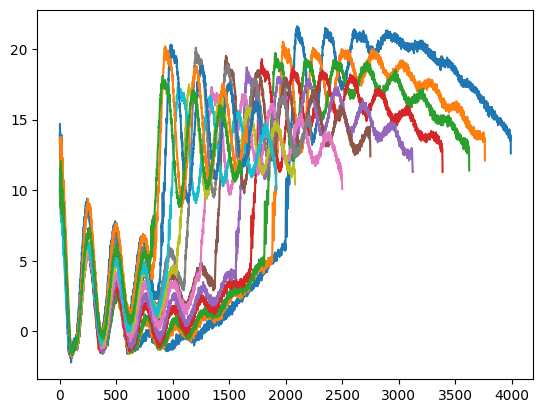

In [40]:

for f in files: 
    if not f in [ref1, ref2]:
        df = pd.read_csv(f)
        Ts = df.Ts.values[0]
        time = np.arange(0,len(df)*Ts, Ts)
        CH2 = df["CH2"].values
        idx_rise = trigger (df["CH4"].values, transition= "rise")
        ind=range(idx_rise[0], idx_rise[1])
        #plt.plot(time[ind ], CH2[ind])
        plt.plot( CH2[ind])

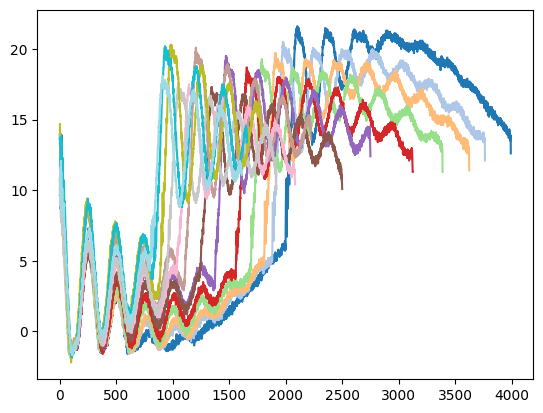

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cmap = plt.colormaps.get_cmap("tab20").resampled(13)   # <- NEW API, no warning

i = 0
for f in files:
    if f not in [ref1, ref2]:
        df = pd.read_csv(f)
        Ts = df.Ts.values[0]
        time = np.arange(0, len(df) * Ts, Ts)
        CH2 = df["CH2"].values
        idx_rise = trigger(df["CH4"].values, transition="rise")
        ind = range(idx_rise[0], idx_rise[1])

        plt.plot(CH2[ind], color=cmap(i))
        i += 1

plt.show()


In [58]:
colors= [f"C{i}" for i in  range(1,10)]+["r","b","k","g","y","m"]
len(colors)

15

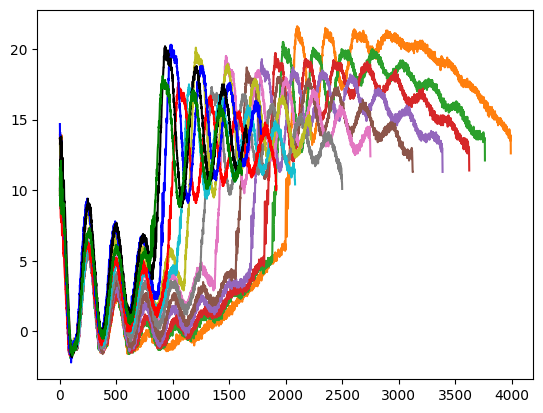

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



i = 0
for f in files:
    if f not in [ref1, ref2]:
        df = pd.read_csv(f)
        Ts = df.Ts.values[0]
        time = np.arange(0, len(df) * Ts, Ts)
        CH2 = df["CH2"].values
        idx_rise = trigger(df["CH4"].values, transition="rise")
        ind = range(idx_rise[0], idx_rise[1])

        plt.plot(CH2[ind], color=colors[i])
        i += 1

plt.show()


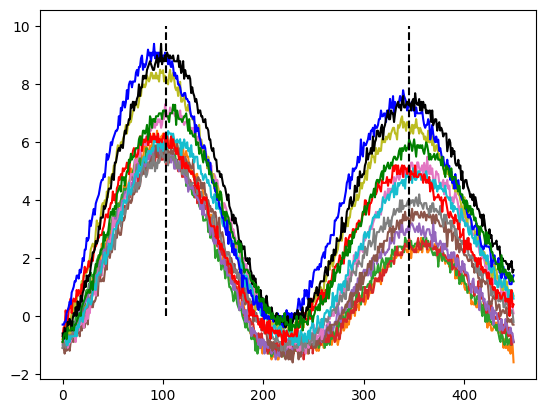

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



i = 0
for f in files:
    if f not in [ref1, ref2]:
        df = pd.read_csv(f)
        Ts = df.Ts.values[0]
        time = np.arange(0, len(df) * Ts, Ts)
        CH2 = df["CH2"].values
        idx_rise = trigger(df["CH4"].values, transition="rise")
        ind = range(idx_rise[0]+150, idx_rise[0]+600)

        plt.plot(CH2[ind], color=colors[i])
        i += 1

i1=103
i2=345
plt.plot([i1,i1],[0,10], c="k", linestyle="--")
plt.plot([i2,i2],[0,10], c="k", linestyle="--")

plt.show()


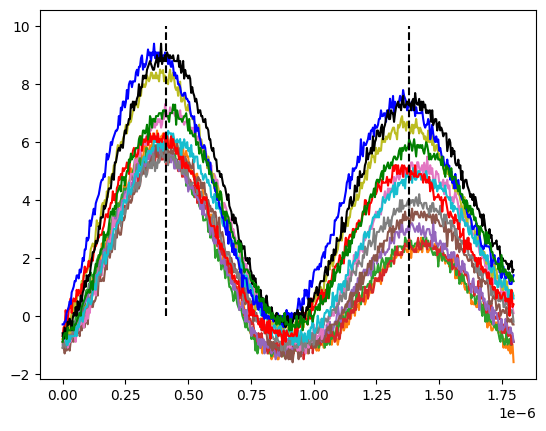

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



i = 0
for f in files:
    if f not in [ref1, ref2]:
        df = pd.read_csv(f)
        Ts = df.Ts.values[0]
        time = np.arange(0, len(df) * Ts, Ts)
        CH2 = df["CH2"].values
        idx_rise = trigger(df["CH4"].values, transition="rise")
        ind = range(idx_rise[0]+150, idx_rise[0]+600)

        plt.plot(time[ind]-time[ind[0]], CH2[ind], color=colors[i])
        i += 1

i1=103
i2=345
plt.plot([time[i1],time[i1]],[0,10], c="k", linestyle="--")
plt.plot([time[i2],time[i2]],[0,10], c="k", linestyle="--")

plt.show()


In [90]:
Fring =1/(time[i2]-time[i1])
Fring *1e-6

np.float64(1.0330578512396693)

In [92]:
from math import pi , sqrt

In [96]:
Coss = 664e-12 # 664 pf
# https://www.onsemi.com/pdf/datasheet/fdh055n15a-d.pdf
#F = 1/2*pi*sqrt(lc)
# Fring = 1.0330578512396693Mhz
Lleak= 1/((2*pi*Fring)**2*Coss)


# Lr = 21uH
# Lm = 83uH
# Cr = 15nF x 8 =120nF
# Np/Ns = 4
N = 4
Lm = 83e-6
Lm_second = Lm/N**2
print(Lleak, Lm_second, Lleak/Lm_second)
# 3.574562529415584e-05 5.1875e-06 6.890722948271006

3.574562529415584e-05 5.1875e-06 6.890722948271006


In [97]:
import numpy as np
from scipy.signal import butter, filtfilt

def lowpass_zero_delay(x, fc, Ts, order=4):
    fs = 1.0 / Ts                 # sampling frequency
    nyq = fs / 2.0                # Nyquist
    Wn = fc / nyq                 # normalized cutoff 0–1

    # Butterworth low-pass
    b, a = butter(order, Wn, btype='low')

    # zero-phase filtering
    y = filtfilt(b, a, x)

    return y
#plt.plot(ic)
#icf = lowpass_zero_delay(x=ic, fc=5e6, Ts=Ts, order=4)


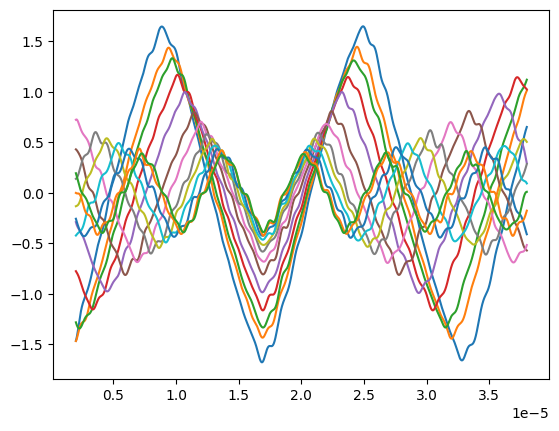

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Cr =15e-9*8

i = 0
for f in files:
    if f not in [ref1, ref2]:
        df = pd.read_csv(f)
        Ts = df.Ts.values[0]
        time = np.arange(0, len(df) * Ts, Ts)
        vc= df["CH3"].values
        
        #icf = lowpass_zero_delay(x=ic, fc=5e6, Ts=Ts, order=4)
        ic = Cr *np.diff(vc)/Ts
        icf = lowpass_zero_delay(x=ic, fc=1e6, Ts=Ts, order=4)
        timed= time[1:]
        icf2 = icf[500:-500]
        timed2 = timed[500:-500]
        plt.plot(timed2 , icf2)




